## Flight Price Prediction

### Problem Statement
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights

FEATURES: 

Airline Name: The name of the airline.

Source: The source from which the service begins.

Destination:The destination where the service ends.

Depature_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Price: The price of the ticket (Rs)


### Data Collection Phase
You have to scrape at least 1500 rows of data. You can scrape more data as well, it’s up to you, More the data better the model In this section you have to scrape the data of flights from different websites (yatra.com, skyscanner.com, official websites of airlines, etc). The number of columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are airline name, date of journey, source, destination, route, departure time, arrival time, duration, total stops and the target variable price. You can make changes to it, you can add or you can remove some columns, it completely depends on the website from which you are fetching the data


### Data Analysis
After cleaning the data, you have to do some analysis on the data. 
Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend 
to go up or down over time?
What is the best time to buy so that the consumer can save the most by taking the least risk?
Does price increase as we get near to departure date? Is Indigo cheaper than Jet Airways? Are 
morning flights expensive?


### Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like.

Data Cleaning

Exploratory Data Analysis

Data Pre-processing

Model Building

Model Evaluation

Selecting the best mode

### OBJECTIVE:To build a machine learning model to predict the price of the flight ticket. Target varibale: Price is the target variable

In [1]:
#loading the required libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
import pandas as pd
df=pd.read_csv('Flight_price_data.csv') #Dataset in excel format

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df  #loading Dataset

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,Indigo,Delhi,Bangalore,03:50,06:40,02h 50m,non-stop,"9,419"
1,Indigo,Delhi,Bangalore,22:55,01:45,02h 50m,non-stop,"9,419"
2,GO FIRST,Delhi,Bangalore,05:50,08:30,02h 40m,non-stop,"9,261"
3,AirAsia,Delhi,Bangalore,21:40,00:30,02h 50m,non-stop,"9,419"
4,GO FIRST,Delhi,Bangalore,20:30,23:20,02h 50m,non-stop,"9,261"
...,...,...,...,...,...,...,...,...
3668,Vistara,Chennai,Hyderabad,10:35,09:25,22h 50m,1-stop,"22,528"
3669,Vistara,Chennai,Hyderabad,17:15,09:25,16h 10m,1-stop,"23,263"
3670,Air India,Chennai,Hyderabad,16:55,23:45,06h 50m,1-stop,NaN
3671,Air India,Chennai,Hyderabad,20:15,11:50,15h 35m,1-stop,NaN


The dataset has 3673 rows and 8 columns.Price is our target column which is continuous ,so this is regression problem.

In [5]:
df.shape    #Checking the dimensions of the dataset

(3673, 8)

In [6]:
df.dtypes #checking the datatypes

Airline Name      object
Source            object
Destination       object
Departure_Time    object
Arrival_Time      object
Duration          object
Total_Stops       object
Price             object
dtype: object

Thus we see that all are in object data types,we need to convert price to int type,remove 'comma' from price value,converting the
others columns into appropritae datatype.

### Departure & Arrival Time

In [7]:
df["Dep_hour"] = pd.to_datetime(df['Departure_Time'], format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df['Departure_Time'], format="%H:%M").dt.minute
df["Departure_Time"]= df['Dep_hour']+df['Dep_min']/60
df.drop(columns = ['Dep_hour','Dep_min'],inplace=True)    

In [8]:
df["Arvl_hour"] = pd.to_datetime(df['Arrival_Time'], format="%H:%M").dt.hour
df["arvl_min"] = pd.to_datetime(df['Arrival_Time'], format="%H:%M").dt.minute
df["Arrival_Time"]= df['Arvl_hour']+df['arvl_min']/60
df.drop(columns = ['Arvl_hour','arvl_min'],inplace=True)    

In [9]:
df.sample(15)

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
2411,Air India,Kolkata,Mumbai,20.250000,16.416667,20h 10m,2+-stop,NaN
100,Vistara,Delhi,Bangalore,8.833333,23.166667,14h 20m,1-stop,"15,296"
1216,Indigo,Bangalore,Hyderabad,15.750000,16.916667,01h 10m,non-stop,"7,894"
2070,Air India,Mumbai,Chennai,9.500000,23.583333,14h 05m,2+-stop,NaN
1622,Air India,Mumbai,Bangalore,15.416667,20.250000,28h 50m,1-stop Via IXU,NaN
2887,Air India,Hyderabad,Mumbai,10.083333,9.083333,23h 00m,1-stop,NaN
2246,Indigo,Kolkata,Bangalore,22.416667,8.666667,10h 15m,1-stop,"11,495"
1729,SpiceJet,Mumbai,Kolkata,7.333333,9.083333,25h 45m,1-stop,NaN
1513,Vistara,Mumbai,Delhi,17.500000,23.833333,06h 20m,1-stop,"18,646"
1175,Vistara,Bangalore,Kolkata,6.666667,19.583333,36h 55m,1-stop,"20,765"


### Dropping duplicated records

In [10]:
df.duplicated().sum() #dropping dulicated records

58

In [11]:
df.drop_duplicates(inplace=True ) #dropping the duplicate records

In [12]:
# Duration
df["hour"] = df['Duration'].str.split('h').str.get(0)
df["min"] = df['Duration'].str.split('h').str.get(1)
df["min"]=df["min"].str.split('m').str.get(0)
df["hour"]=df['hour'].astype('float')
df["min"]=df['min'].astype('float')

df["Duration"] = df["hour"] + df["min"]/60

In [13]:
df.head()

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price,hour,min
0,Indigo,Delhi,Bangalore,3.833333,6.666667,2.833333,non-stop,"9,419",2.0,50.0
1,Indigo,Delhi,Bangalore,22.916667,1.750000,2.833333,non-stop,"9,419",2.0,50.0
2,GO FIRST,Delhi,Bangalore,5.833333,8.500000,2.666667,non-stop,"9,261",2.0,40.0
3,AirAsia,Delhi,Bangalore,21.666667,0.500000,2.833333,non-stop,"9,419",2.0,50.0
4,GO FIRST,Delhi,Bangalore,20.500000,23.333333,2.833333,non-stop,"9,261",2.0,50.0


In [14]:
#dropping hour and min columns
df.drop(columns = ["hour","min"], inplace = True)

In [15]:
#Converting data type of Price column to float
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

In [16]:
df.sample(3)

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
279,Vistara,Delhi,Mumbai,18.166667,9.666667,15.50,1-stop,11027.0
3527,Vistara,Chennai,Kolkata,21.083333,8.333333,11.25,1-stop,14378.0
3516,Vistara,Chennai,Kolkata,7.083333,8.333333,25.25,1-stop,13055.0


In [17]:
d=df.columns
for i in d:
    print(df[i].value_counts())
    print("--- --:-- --- --:----- --:-- --- --:----- --:-- ---")

Vistara        1384
Indigo          914
Air India       673
SpiceJet        257
AirAsia         218
GO FIRST        165
AllianceAir       4
Name: Airline Name, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
Delhi        735
Mumbai       714
Bangalore    606
Kolkata      566
Hyderabad    498
Chennai      496
Name: Source, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
Delhi        742
Mumbai       692
Kolkata      613
Bangalore    605
Chennai      493
Hyderabad    470
Name: Destination, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
7.000000     109
7.166667      93
10.250000     56
20.500000     53
6.666667      50
20.666667     48
10.416667     47
7.500000      47
17.583333     47
8.500000      46
9.750000      46
9.500000      45
20.583333     42
6.000000      41
18.000000     41
21.333333     39
17.500000     39
20.166667     38
7.333333      38
19.000000     38
8.000000      37
12.500000     37
15.500000     36
20.250000     35


In [18]:
# Stops
df['Total_Stops'].replace({"non-stop": 0,
            "1-stop": 1,
            "1-stop Via IXU": 1,
            "1-stop Via Indore":1,
            "1-stop Via IDR":1,
            "1-stop Via CNN":1,
            "1-stop Via Delhi":1,              
            "2+-stop": 2,},
           inplace = True)

In [19]:
df['Total_Stops'].value_counts()

1    2687
0     534
2     394
Name: Total_Stops, dtype: int64

In [20]:
df.dtypes

Airline Name       object
Source             object
Destination        object
Departure_Time    float64
Arrival_Time      float64
Duration          float64
Total_Stops         int64
Price             float64
dtype: object

In [21]:
df.columns #after data cleaning we have 8 columns in the data set

Index(['Airline Name', 'Source', 'Destination', 'Departure_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Price'], dtype='object')

In [22]:
#checking missing value
df.isnull().sum()

Airline Name        0
Source              0
Destination         0
Departure_Time      0
Arrival_Time        0
Duration            0
Total_Stops         0
Price             901
dtype: int64

As Price column has null values 901 ,not implementing impute technique as this is my target column,as per problem statement,we 
need to have atleast 1500 datas,so we can drop the rows having Nan values. 

In [23]:
df=df.dropna()
df = df.reset_index(drop=True)
print (df)

     Airline Name   Source Destination  Departure_Time  Arrival_Time   Duration  Total_Stops    Price
0          Indigo    Delhi   Bangalore        3.833333      6.666667   2.833333            0   9419.0
1          Indigo    Delhi   Bangalore       22.916667      1.750000   2.833333            0   9419.0
2        GO FIRST    Delhi   Bangalore        5.833333      8.500000   2.666667            0   9261.0
3         AirAsia    Delhi   Bangalore       21.666667      0.500000   2.833333            0   9419.0
4        GO FIRST    Delhi   Bangalore       20.500000     23.333333   2.833333            0   9261.0
...           ...      ...         ...             ...           ...        ...          ...      ...
2709      Vistara  Chennai   Hyderabad       17.250000     19.833333  26.583333            1  21478.0
2710      Vistara  Chennai   Hyderabad       21.083333      9.416667  12.333333            1  22003.0
2711      Vistara  Chennai   Hyderabad       10.583333     17.000000   6.416667   

Thus we see after dropping all the null values from the dataset,our news row is 2714 and columns is 8.

<AxesSubplot:>

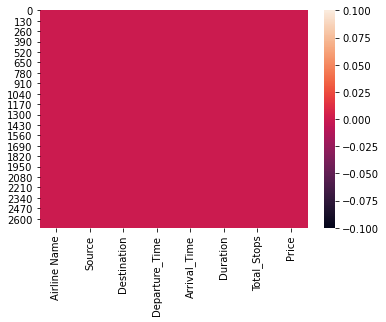

In [24]:
#validating missing value using heatmap
sns.heatmap(df.isnull()) 

In [25]:
df.isnull().sum()

Airline Name      0
Source            0
Destination       0
Departure_Time    0
Arrival_Time      0
Duration          0
Total_Stops       0
Price             0
dtype: int64

Thus we see there is no missing value present now.

In [26]:
df.describe(include=np.object) ## description of the categorical features

,Airline Name,Source,Destination
count,2714,2714,2714
unique,6,6,6
top,Vistara,Delhi,Delhi
freq,1384,538,545


Thus For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. The unique represent the distinct values.

Observation:

1.No missimg value as it has been dropped.

2.Thus we see airline,source and destination each has 6 distinct columns.


In [27]:
df.describe() #it provides statistical information about the numerical datatypes.

,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
count,2714.000000,2714.000000,2714.000000,2714.000000,2714.000000
mean,13.399134,15.822894,10.966132,0.946205,14306.270818
std,5.376251,6.209162,8.031470,0.536932,5342.455310
min,3.833333,0.083333,0.750000,0.000000,5256.000000
25%,8.500000,11.166667,5.250000,1.000000,9679.000000
50%,12.750000,17.500000,8.750000,1.000000,13556.000000
75%,18.416667,20.916667,14.583333,1.000000,17608.000000
max,23.916667,23.916667,40.583333,2.000000,39223.000000


Observation:
    
1.There is high variance in price column.

2.The mean value is greater than median value in duration,price,depature_time that means data are positively skewed.

3.The mean value is less than median value in Total_stops,depature_time,arrival_time that means data are negatively skewed(the distribution is negatively skewed).

3.The high gap between the max and 75% lead to formation of outliers that can be seen in Duration,Price column.

4.The minimum Price of the flight ticket is Rs.5256 and maximum price of the flight ticket is Rs.39223.

### Univariate Analysis for categorical columns

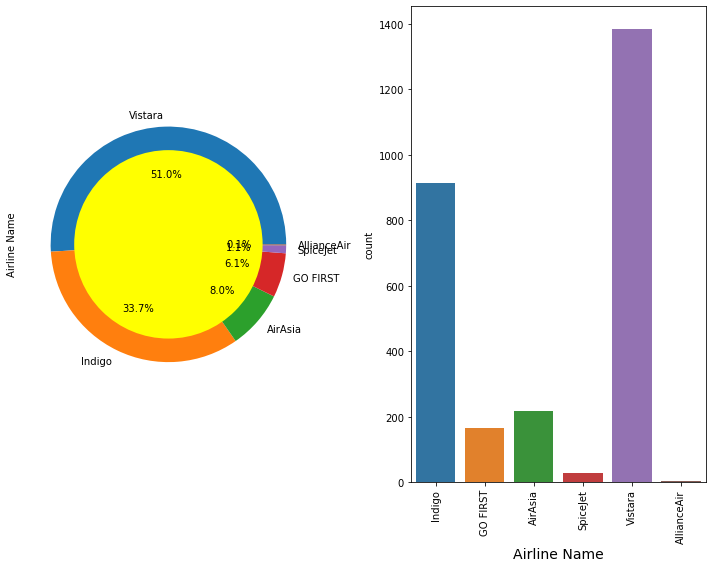

Vistara        1384
Indigo          914
AirAsia         218
GO FIRST        165
SpiceJet         29
AllianceAir       4
Name: Airline Name, dtype: int64

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df['Airline Name'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.8,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Airline Name' , data=df)
plt.xlabel('Airline Name', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Airline Name'].value_counts()

Thus we see Vistara has highest number of records about 51% followed by Indigo (33.7%).Air Passenger are preffering the Vistara airways the most.

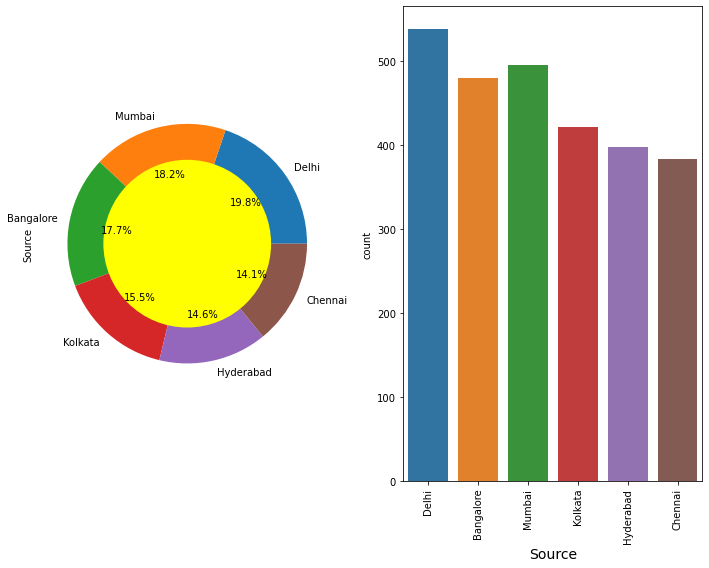

Delhi        538
Mumbai       495
Bangalore    480
Kolkata      421
Hyderabad    397
Chennai      383
Name: Source, dtype: int64

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df['Source'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Source' , data=df)
plt.xlabel('Source', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Source'].value_counts()

Thus we see mostly people are boarding from Delhi and Mumbai about 19.8% and 18.2% respectively and least is Chennai (14.1%).

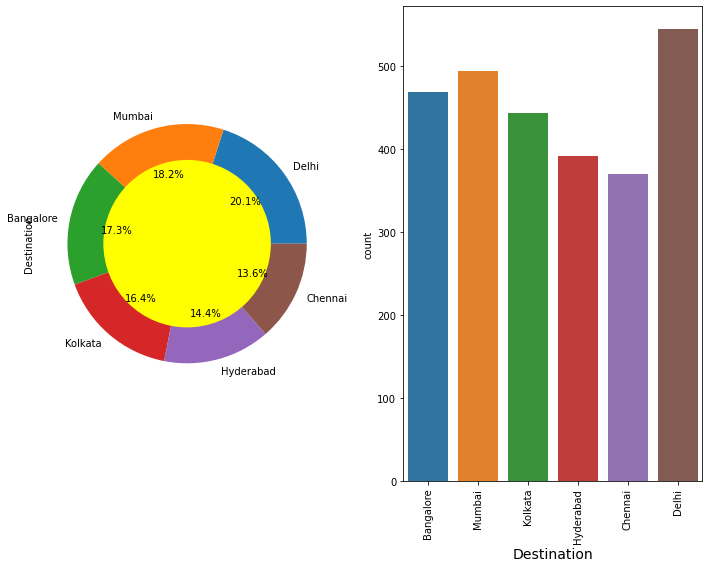

Delhi        545
Mumbai       494
Bangalore    469
Kolkata      444
Hyderabad    392
Chennai      370
Name: Destination, dtype: int64

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df['Destination'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Destination' , data=df)
plt.xlabel('Destination', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Destination'].value_counts()

Thus we see most people are travelling to Delhi,Mumbai about 20.1% and 18.2% respectively and least is Chennai(13.6%).

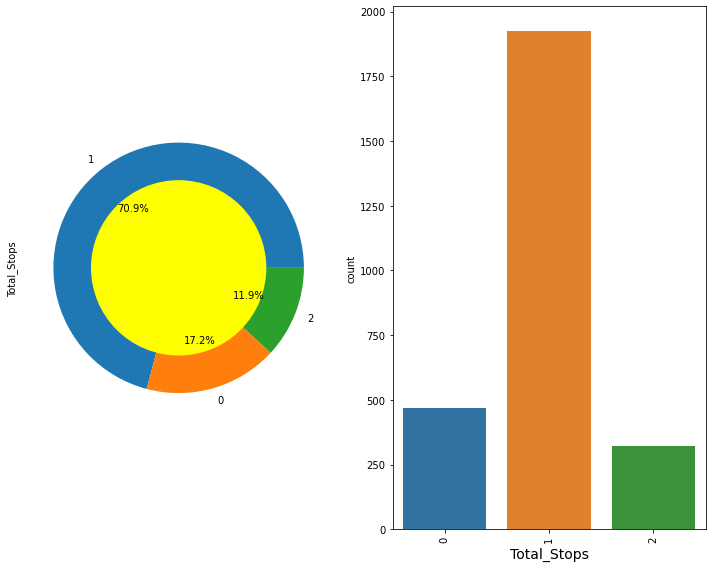

1    1924
0     468
2     322
Name: Total_Stops, dtype: int64

In [31]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
df['Total_Stops'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='yellow')
fig=plt.gcf()
fig.gca().add_artist(centre)

plt.subplot(1,2,2)
sns.countplot(x='Total_Stops' , data=df)
plt.xlabel('Total_Stops', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Total_Stops'].value_counts()

Thus we see that 1 stop route comprises 70.9% records followed by non_stop(17.2%) and least is 2 stops (11.9%),people preferring one stop route followed by non stop

8579.0     59
9447.0     38
9132.0     35
8894.0     33
8883.0     32
           ..
13800.0     1
14194.0     1
17130.0     1
11307.0     1
10463.0     1
Name: Price, Length: 1129, dtype: int64

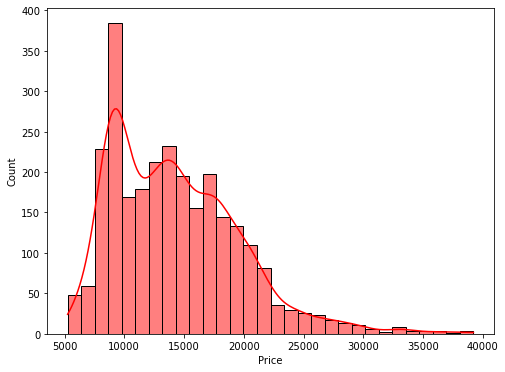

In [32]:
plt.figure(figsize=(8,6))
sns.histplot(df['Price'],kde=True,color='r')
df['Price'].value_counts()


Most of the price for flights lie in the range 5000 to 25000.

# Bivariate Analysis/Multivariate Analysis

### Comparing Price vs Airline

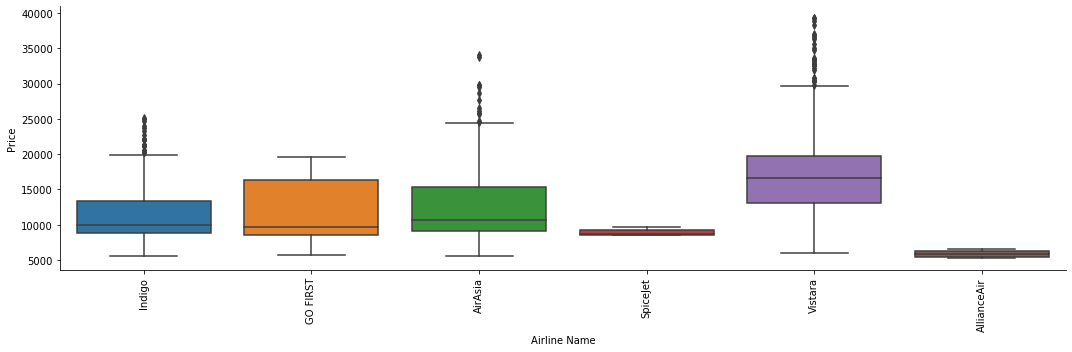

In [33]:
sns.catplot(y="Price", x ="Airline Name", data = df, kind="box", height =5, aspect = 3)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This shows that Vistara airways is having high average price and least average price is Aliance Air.

### comparing price vs Source

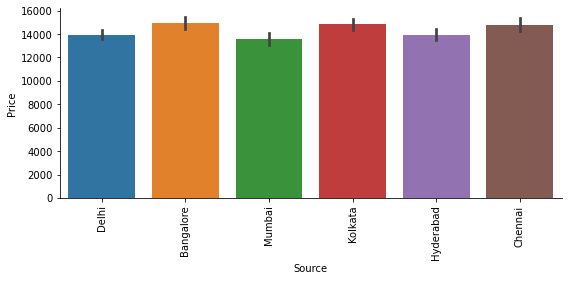

In [34]:
sns.catplot(y="Price", x = "Source", data = df, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Maximum People boarding from Bangalore and they afford to pay high price followed by kolkata and least is Mumbai.

### Comparing Price vs Destination

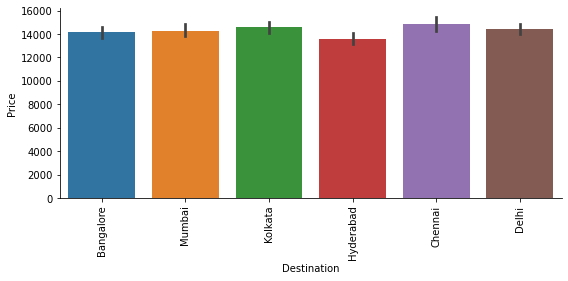

In [35]:
sns.catplot(y="Price", x = "Destination", data = df, kind="bar", height =4, aspect = 2)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Majority of flight landed to Bangalore,Mumbai,Kolkata,Chennai,they can afford to pay high price and least is Hyderabad.

(array([0, 1, 2]), [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

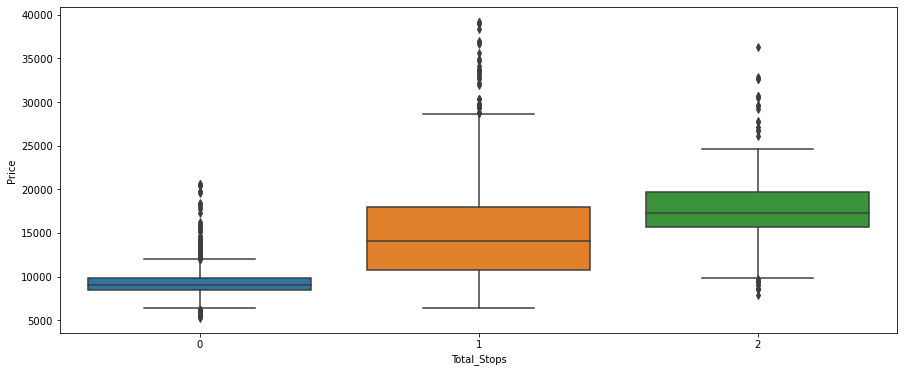

In [36]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Total_Stops',y='Price',data=df)
plt.xticks(rotation=0)

Those flights having non-stop having low average price followed by one stop and those with 2 stops has high average price.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Indigo'),
  Text(1, 0, 'GO FIRST'),
  Text(2, 0, 'AirAsia'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'AllianceAir')])

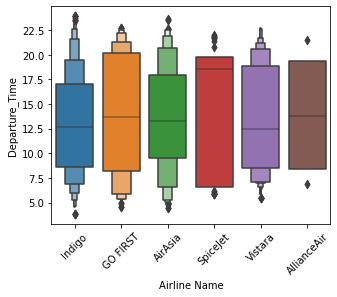

In [37]:
plt.figure(figsize=(5,4))
sns.boxenplot(x='Airline Name',y='Departure_Time',data=df)
plt.xticks(rotation=45)

Departure hour is maximum for flight Spicejet that is 17.5 hours approx and least is Vistara that is between 10-12.5 hours.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Indigo'),
  Text(1, 0, 'GO FIRST'),
  Text(2, 0, 'AirAsia'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'AllianceAir')])

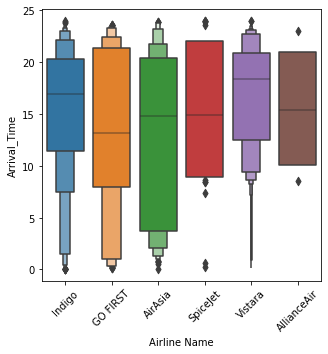

In [38]:
plt.figure(figsize=(5,5))
sns.boxenplot(x='Airline Name',y='Arrival_Time',data=df)
plt.xticks(rotation=45)

Go First has less arrival time followed by Air Asia and Spicejet. 

<AxesSubplot:xlabel='Source', ylabel='count'>

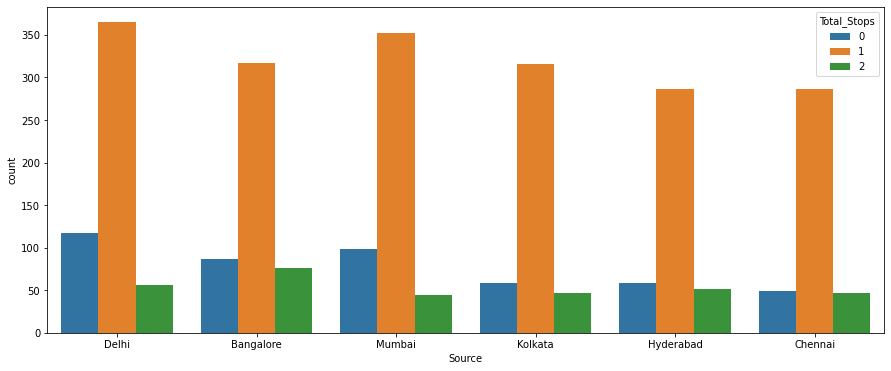

In [39]:
plt.figure(figsize=(15,6))
sns.countplot(df['Source'],hue='Total_Stops',data=df)

Majority of flight having source as delhi has only 1 stop.Non-stop flights are covering all the source.Also 2 stop flights covering all the  sources.

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

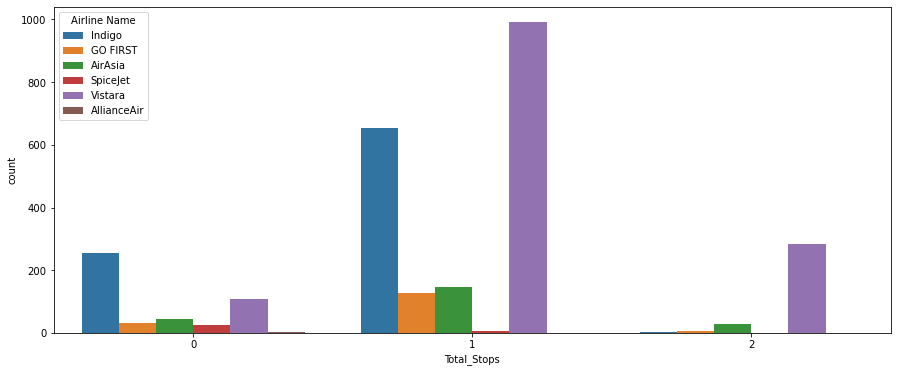

In [40]:
plt.figure(figsize=(15,6))
sns.countplot(df['Total_Stops'],hue='Airline Name',data=df,palette='tab10')

Vistara has high one-stop flights and least is non_stop flights which is followed by Indigo.Most of the flights are non_stop.

<AxesSubplot:xlabel='Destination', ylabel='count'>

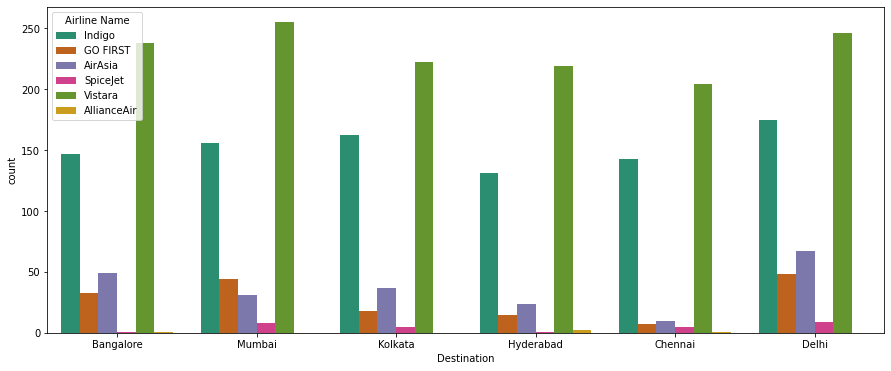

In [41]:
plt.figure(figsize=(15,6))
sns.countplot(df['Destination'],hue='Airline Name',data=df,palette='Dark2')

Majority of the Vistara flights has destination at Mumbai followed by Bangalore and Delhi.Chennai has the least.

<AxesSubplot:xlabel='Source', ylabel='count'>

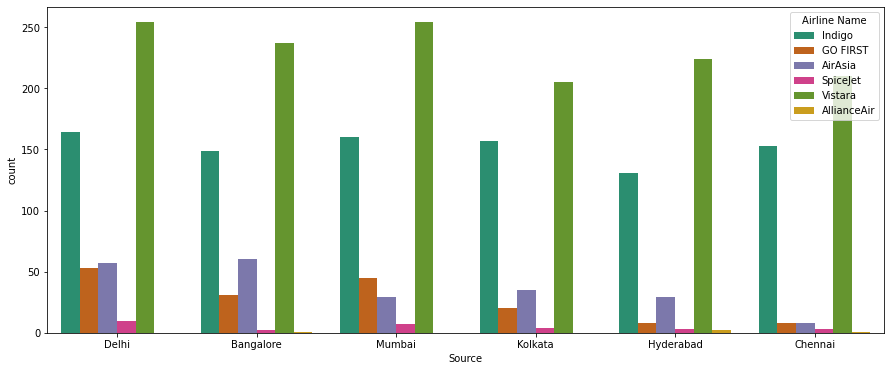

In [42]:
plt.figure(figsize=(15,6))
sns.countplot(df['Source'],hue='Airline Name',data=df,palette='Dark2')

Majoriy of the Vistara flight covering all the source.Alliance air doesnt cover Delhi,Mumbai,Kolkata

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Indigo'),
  Text(1, 0, 'GO FIRST'),
  Text(2, 0, 'AirAsia'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'AllianceAir')])

<Figure size 1080x432 with 0 Axes>

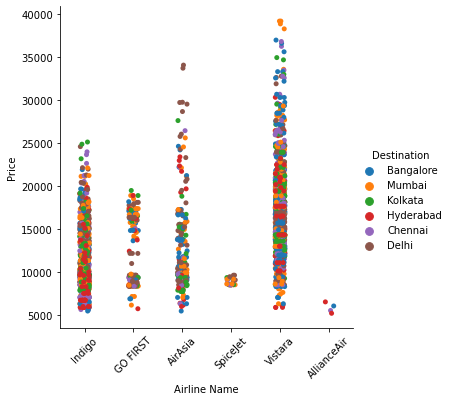

In [43]:
plt.figure(figsize=(15,6))
sns.catplot(x='Airline Name',y='Price',hue='Destination',data=df)
plt.xticks(rotation=45)

Highest price is charged by Vistara airways  while having its destination as Mumbai.Spicejet is having destination as mumbai,delhi,kolkata charging price between 5k-10k whereas AllianceAir too charging less as 5k having destination as hyderabad,Bangalore and Chennai.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Indigo'),
  Text(1, 0, 'GO FIRST'),
  Text(2, 0, 'AirAsia'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'AllianceAir')])

<Figure size 1080x432 with 0 Axes>

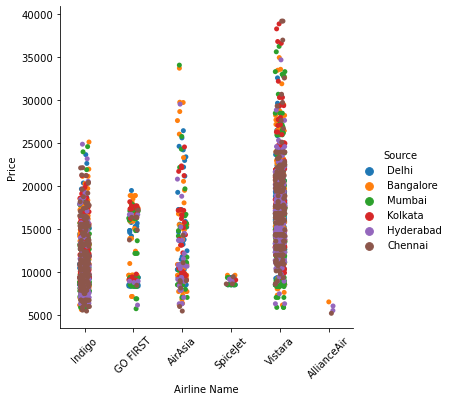

In [44]:
plt.figure(figsize=(15,6))
sns.catplot(x='Airline Name',y='Price',hue='Source',data=df)
plt.xticks(rotation=45)

Thus we can see Vistara having source at Chennai is charging very high price where the price is above 20000.Spicejet having sources
at chennai,mumbai,delhi,kolkata charging prices between 5k-10k. AllianceAir is also charginh less price as much as 5k where its
sources are at chennai,hyderabad,bangalore.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Indigo'),
  Text(1, 0, 'GO FIRST'),
  Text(2, 0, 'AirAsia'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Vistara'),
  Text(5, 0, 'AllianceAir')])

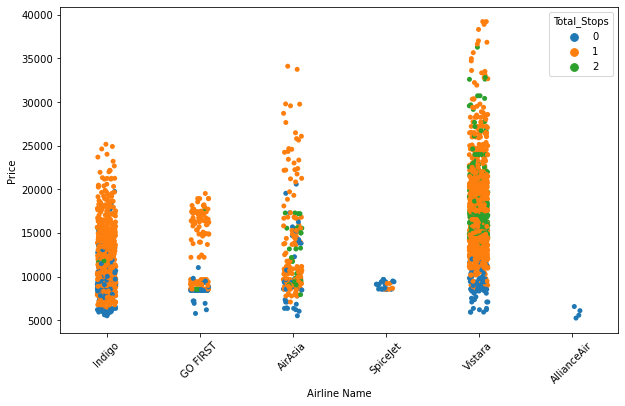

In [45]:
plt.figure(figsize=(10,6))
sns.stripplot(x='Airline Name',y='Price',hue='Total_Stops',data=df)
plt.xticks(rotation=45)

Non stop flights are cost less.Those flights which have one stop are price little higher followed by two stops. Vistara is having maximum one stop where price is above 10000.AllianceAir is having non stopflight and price is also around 5k.

<AxesSubplot:xlabel='Source', ylabel='Price'>

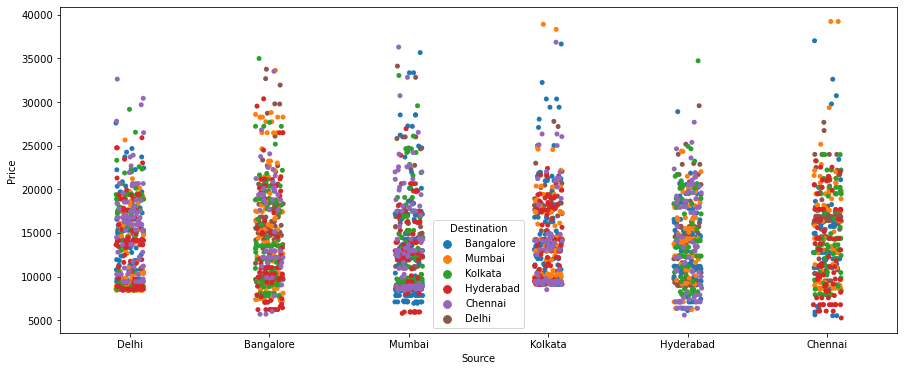

In [46]:
plt.figure(figsize=(15,6))
sns.stripplot(x='Source',y='Price',hue='Destination',data=df)

Bangalore Flight having destination at chennai , hyderabad,Mumbai is priced less than the delhi.Similarly Mumbai Flight having destination at Hyderabad,Bangalore are priced less than Chennai/Kolkata. Kolkata Flight having destination at Chennai is priced less than others.Thus we came to a conclusion that  its depends upon the distance coverage also.The more the distance between source and destination ,more the price.

<AxesSubplot:xlabel='Arrival_Time', ylabel='Price'>

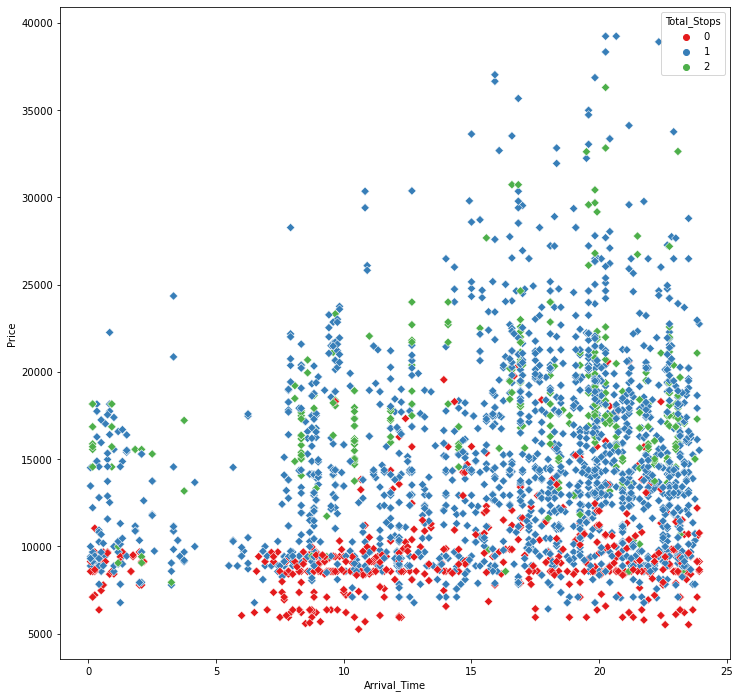

In [47]:
plt.figure(figsize=(12,12))
sns.scatterplot(x='Arrival_Time',y='Price',hue='Total_Stops',data=df,marker='D',palette='Set1')

Those which have non_stop flight are having flight tickets cheap and the price is somewhat less than 10000 in most cases. Those flights having one stop or two stop having flight tickets expensive and price having more than 10k in most of the cases.

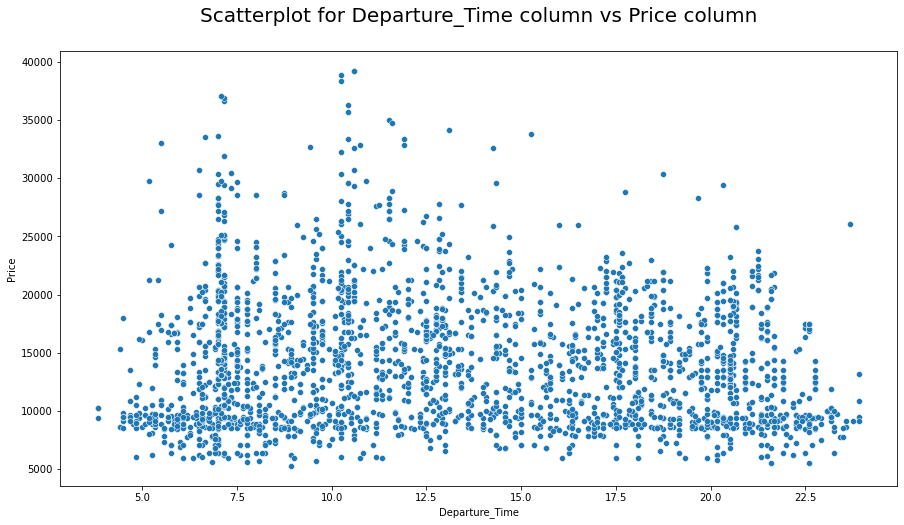

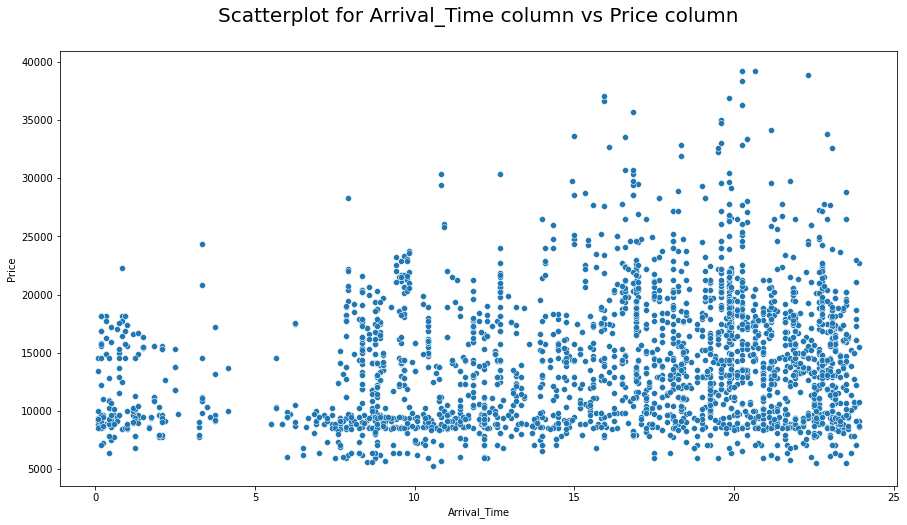

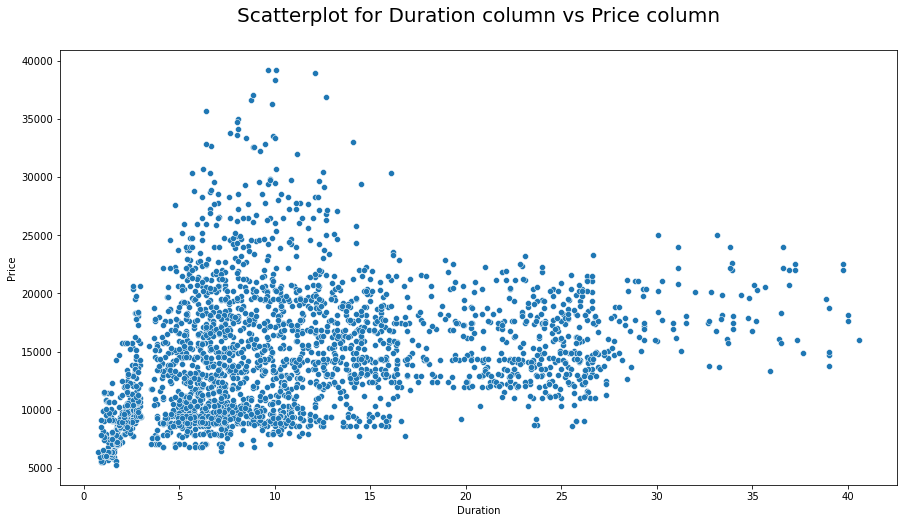

In [48]:
y = "Price"

x = "Departure_Time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "Arrival_Time"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

x = "Duration"
plt.figure(figsize = (15,8))
sns.scatterplot(x=x,y=y,data=df)
plt.title(f"Scatterplot for {x} column vs {y} column\n", fontsize = 20)
plt.show()

Thus we see the comparison where flight prices are the highest during peak hours as compared to midnight (late hours) timings for departure.
We can see a similar trend when it comes to arrival timing where we see a decrease in prices between 1:00 hrs and 7:00 hrs
Overall flight duration increases the flight prices increase too. 

<AxesSubplot:xlabel='Price', ylabel='Density'>

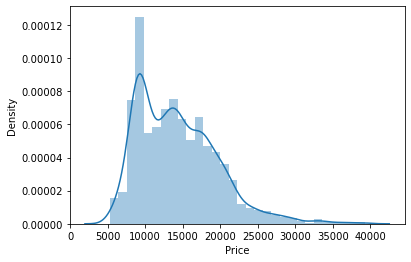

In [49]:
sns.distplot(df['Price'])

Our target column is right skewed ,as this is our label ,so we will leave it as it is

Slight skewness is there.

<AxesSubplot:xlabel='Departure_Time', ylabel='Density'>

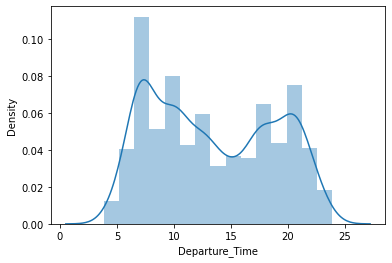

In [50]:
sns.distplot(df['Departure_Time'])

This is bimodal distribution.skewness is there.

<AxesSubplot:xlabel='Arrival_Time', ylabel='Density'>

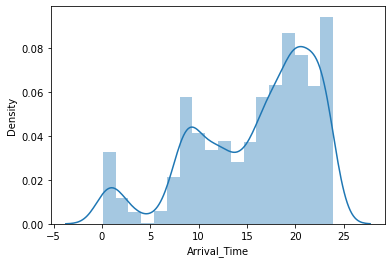

In [51]:
sns.distplot(df['Arrival_Time'])

This is a multimodal distribution

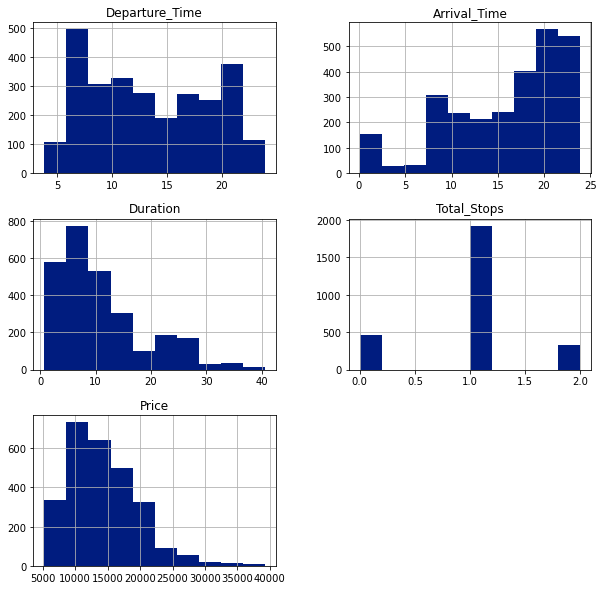

In [52]:
plt.style.use('seaborn-dark-palette')
df.hist(figsize=(10,10))
plt.show()

Thus we see histogram represnts the frequency distribution of each coluumn.It shows some are close to normal distribution, some are multimodial distribution and some have bimodal distribution.

# Encoding of categorical column

In [53]:
#converting categorical data into numeric using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [54]:
#validating the encoder
df.head()

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
0,3.0,2.0,0.0,3.833333,6.666667,2.833333,0,9419.0
1,3.0,2.0,0.0,22.916667,1.750000,2.833333,0,9419.0
2,2.0,2.0,0.0,5.833333,8.500000,2.666667,0,9261.0
3,0.0,2.0,0.0,21.666667,0.500000,2.833333,0,9419.0
4,2.0,2.0,0.0,20.500000,23.333333,2.833333,0,9261.0


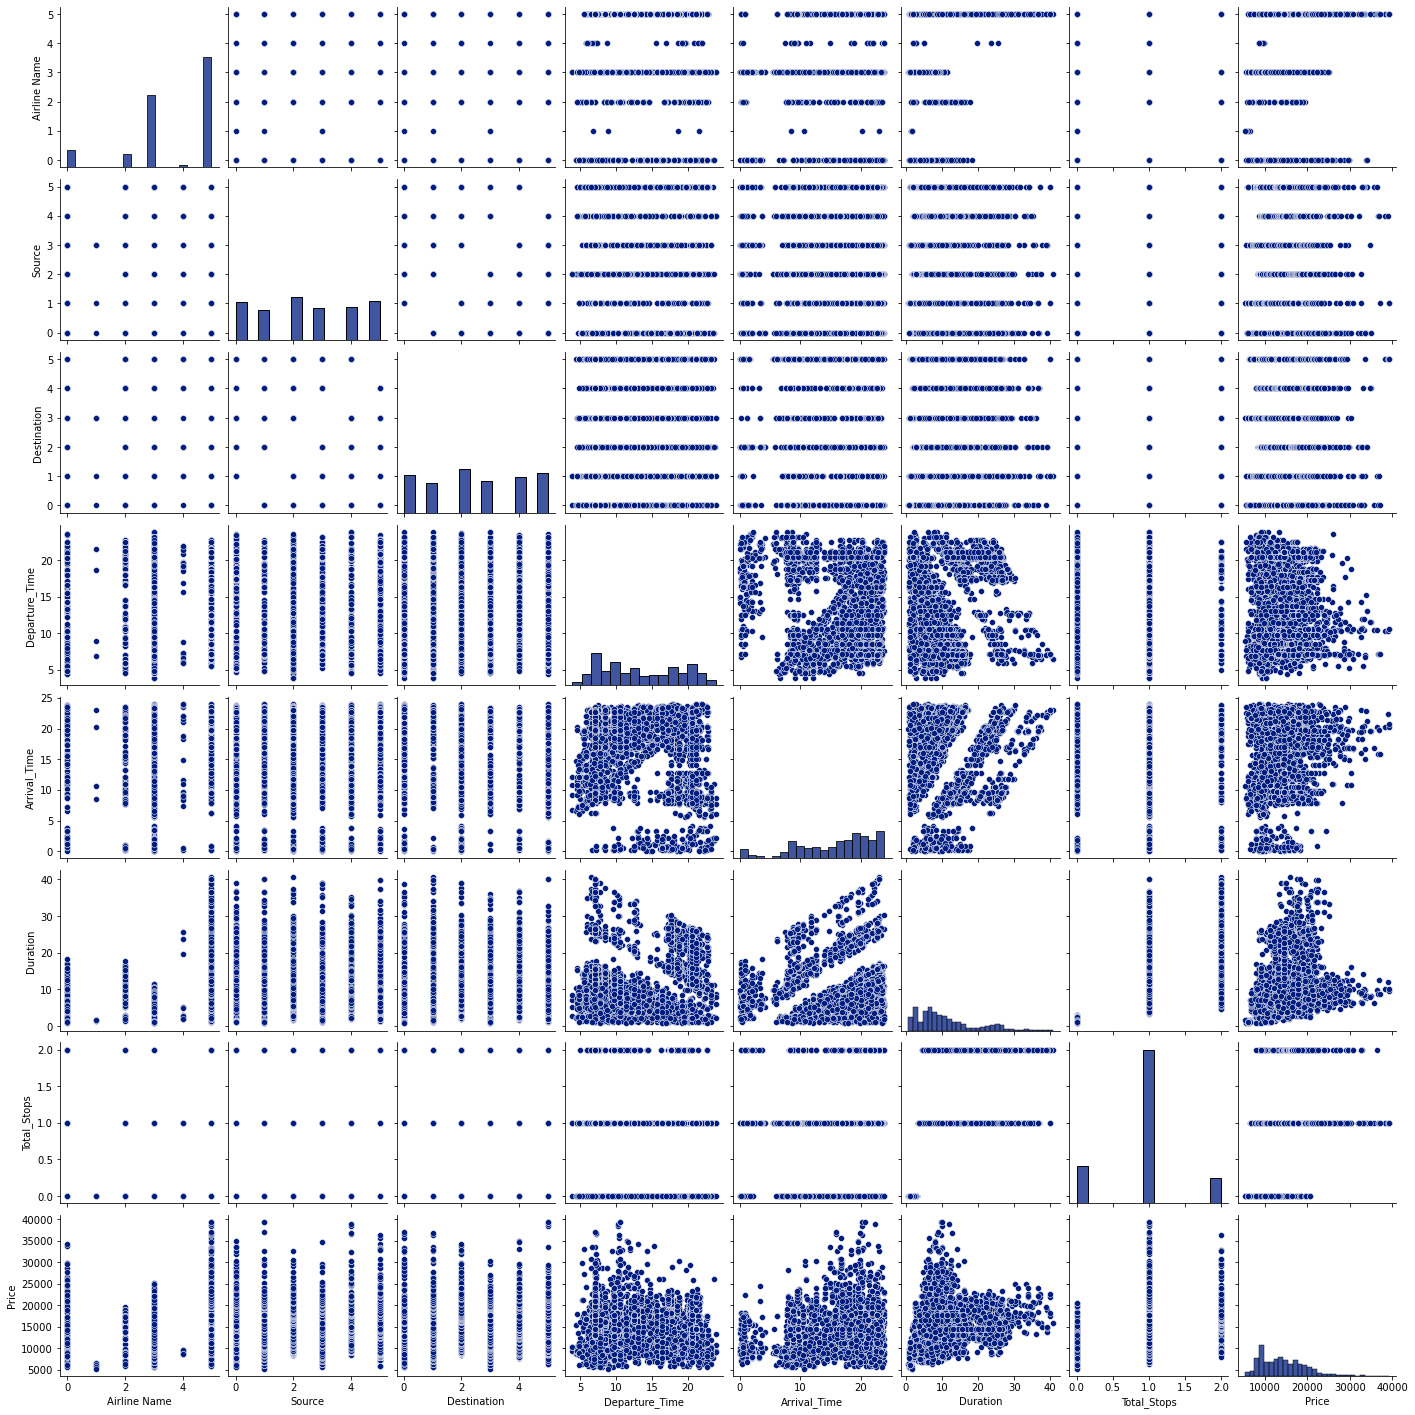

In [55]:
sns.pairplot(df) #shows multiple pairwise bivariate distributions in a dataset and shows relationship bw them.

Observation:Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical. The pairs plot builds on two basic figures, the histogram and the scatter plot.

### Correlation

In [56]:
df.corr()

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Price
Airline Name,1.000000,0.022608,0.015667,0.009587,0.203509,0.438960,0.234203,0.377295
Source,0.022608,1.000000,-0.262913,0.047183,0.007770,-0.007477,-0.035958,-0.063407
Destination,0.015667,-0.262913,1.000000,0.014983,0.013934,-0.014909,-0.062362,-0.007039
Departure_Time,0.009587,0.047183,0.014983,1.000000,-0.045686,0.072783,-0.092635,-0.092620
Arrival_Time,0.203509,0.007770,0.013934,-0.045686,1.000000,0.092286,0.075823,0.204870
Duration,0.438960,-0.007477,-0.014909,0.072783,0.092286,1.000000,0.573916,0.316503
Total_Stops,0.234203,-0.035958,-0.062362,-0.092635,0.075823,0.573916,1.000000,0.437531
Price,0.377295,-0.063407,-0.007039,-0.092620,0.204870,0.316503,0.437531,1.000000


<AxesSubplot:>

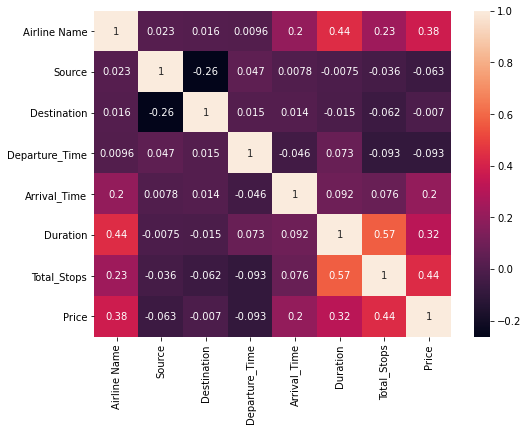

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

Price has positive correlation with Airline Name,Total_stops,Duration,arr_hour,dep_hour,arr_min ,there is no strong multicollinerity in the  dataset. Duration is positively correlated with total_stops at 57%.

### Outliers

Airline Name         AxesSubplot(0.125,0.826831;0.0824468x0.053169)
Source            AxesSubplot(0.223936,0.826831;0.0824468x0.053169)
Destination       AxesSubplot(0.322872,0.826831;0.0824468x0.053169)
Departure_Time    AxesSubplot(0.421809,0.826831;0.0824468x0.053169)
Arrival_Time      AxesSubplot(0.520745,0.826831;0.0824468x0.053169)
Duration          AxesSubplot(0.619681,0.826831;0.0824468x0.053169)
Total_Stops       AxesSubplot(0.718617,0.826831;0.0824468x0.053169)
Price             AxesSubplot(0.817553,0.826831;0.0824468x0.053169)
dtype: object

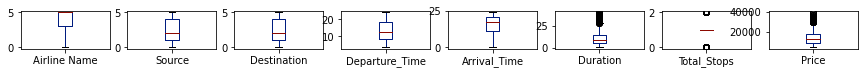

In [58]:
df.plot(kind='box',subplots=True,layout=(12,8),figsize=(15,10))

Thus we can see outliers present in price ,total_stops and duration column,so we will leave price column as it is ,will remove 
outliers in duration which has maximum outliers.

#### Outlier Removal

In [59]:
df=df[np.abs(df.Duration-df.Duration.mean())<=(1.5*df.Duration.std())]

<AxesSubplot:xlabel='Duration'>

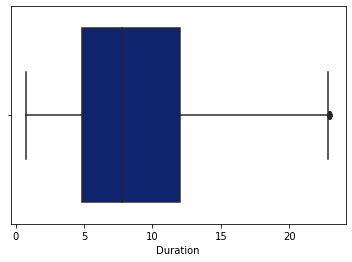

In [60]:
sns.boxplot(df['Duration']) # Thus we see outlier has been removed to max extent.

#### validation removal of outlier

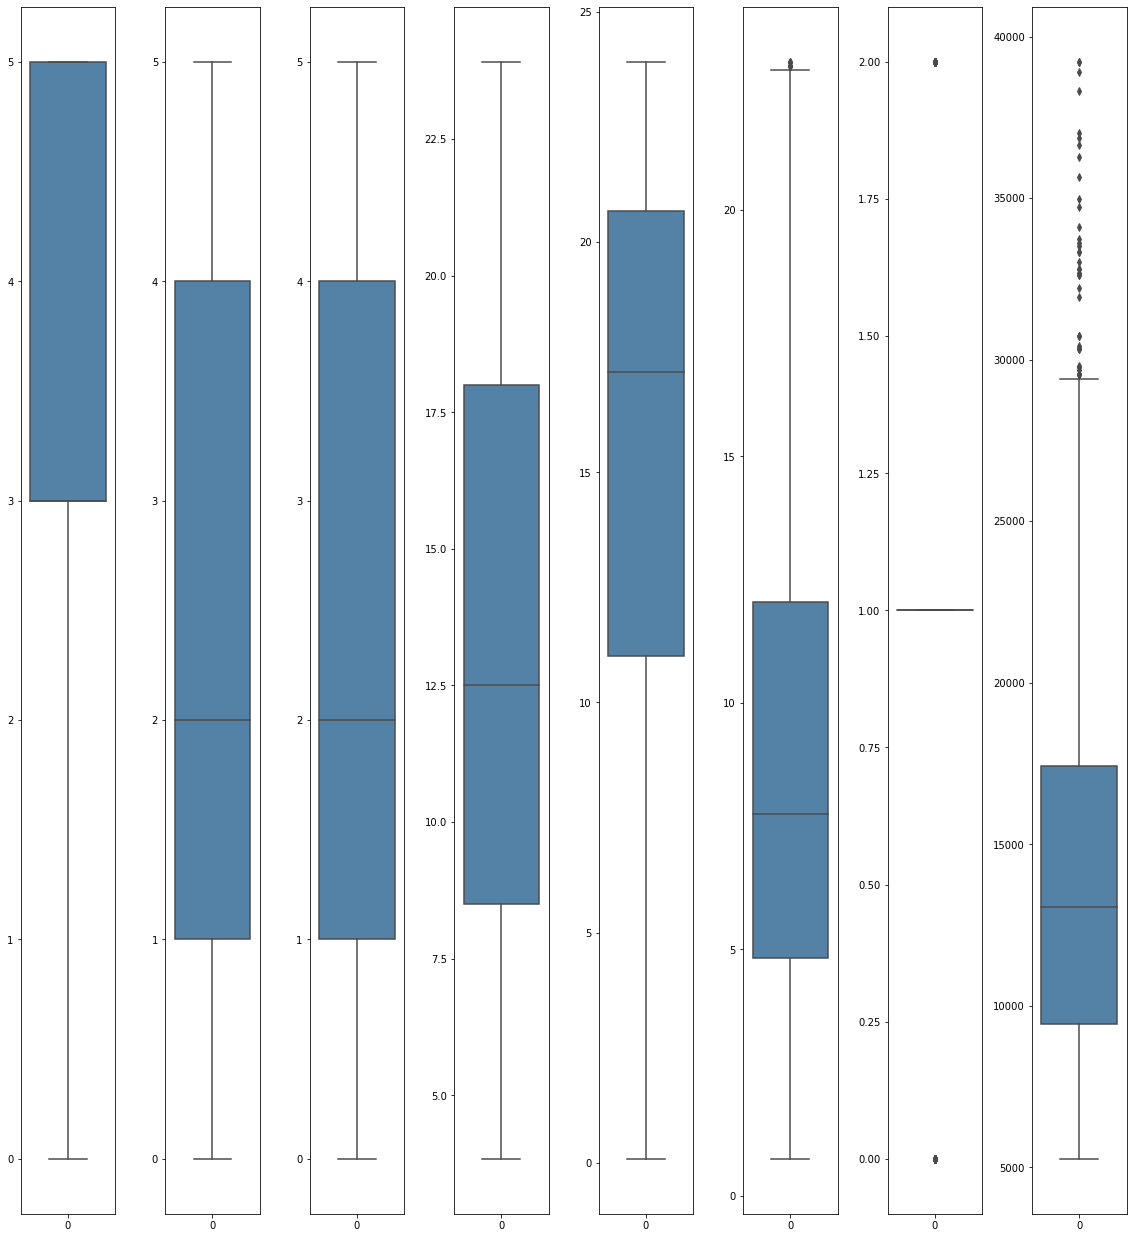

In [61]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='steelblue',orient='v')
    plt.tight_layout()

#### bar plot showing correlation bw target and features

Text(0.5, 1.0, 'correlation')

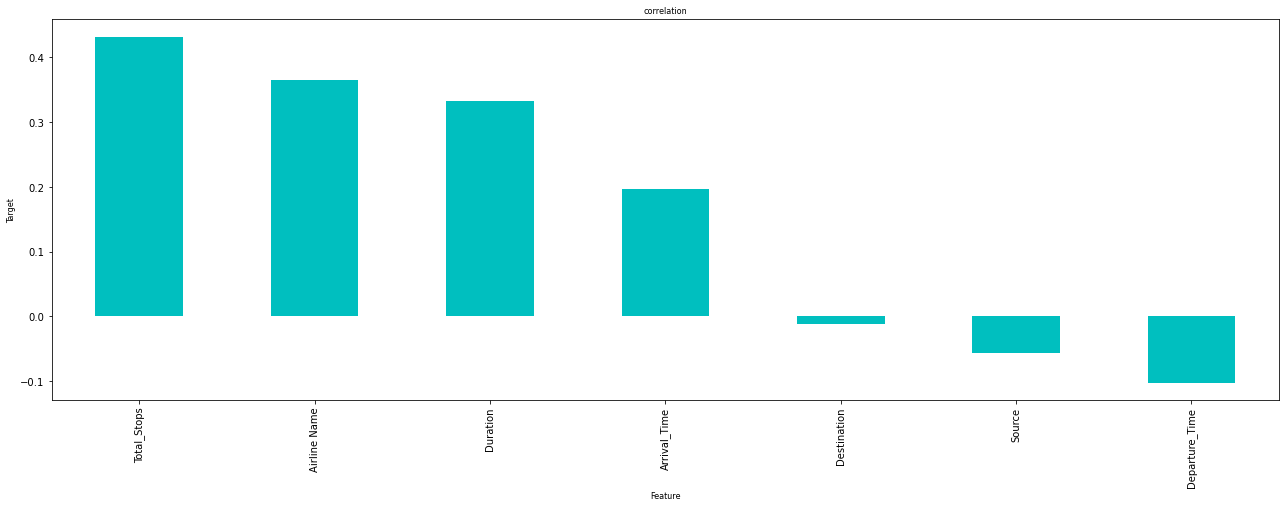

In [62]:
plt.figure(figsize=(22,7))
df.corr()['Price'].sort_values(ascending=False).drop(["Price"]).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=8)
plt.ylabel("Target",fontsize=8)
plt.title('correlation',fontsize=8)  

Thus we see that price is dependent on Total_Stops,Airline Name ,Duration,arrival_time and negatively correlated with rest.

# Separating x and y as independent and dependent variable

In [63]:
x=df.drop(columns=['Price'])
y=df['Price']

In [64]:
x.head()

,Airline Name,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops
0,3.0,2.0,0.0,3.833333,6.666667,2.833333,0
1,3.0,2.0,0.0,22.916667,1.750000,2.833333,0
2,2.0,2.0,0.0,5.833333,8.500000,2.666667,0
3,0.0,2.0,0.0,21.666667,0.500000,2.833333,0
4,2.0,2.0,0.0,20.500000,23.333333,2.833333,0


In [65]:
y.head()

0    9419.0
1    9419.0
2    9261.0
3    9419.0
4    9261.0
Name: Price, dtype: float64

In [66]:
x.skew()

Airline Name     -0.840197
Source           -0.000784
Destination      -0.023041
Departure_Time    0.216779
Arrival_Time     -0.771355
Duration          0.713351
Total_Stops      -0.148609
dtype: float64

### Feature Importance

,Importance
Features,
Duration,0.292
Airline Name,0.266
Arrival_Time,0.151
Departure_Time,0.141
Destination,0.066
Source,0.064
Total_Stops,0.020


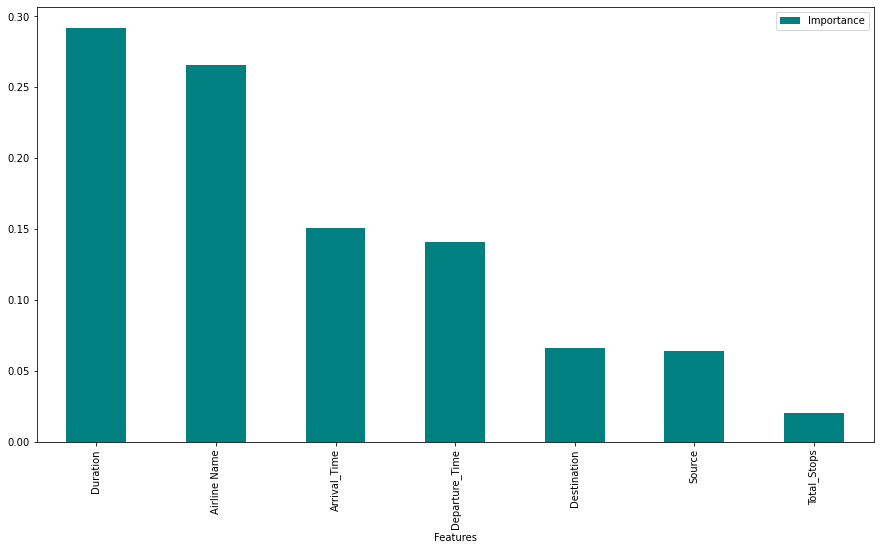

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rfr.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
plt.rcParams["figure.figsize"] = (15,8)
importances.plot.bar(color='teal')
importances

### Treating Skewness

In [76]:
#using power transform it can work upon both negative and positive skewed value 
from sklearn.preprocessing import power_transform
x=pd.DataFrame(power_transform(x,method='yeo-johnson'))
x

,0,1,2,3,4,5,6
0,-0.508604,-0.224191,-1.558401,-2.228127,-1.435780,-1.218704,-1.676276
1,-0.508604,-0.224191,-1.558401,1.604000,-1.947647,-1.218704,-1.676276
2,-1.115107,-0.224191,-1.558401,-1.573282,-1.197330,-1.276677,-1.676276
3,-1.948407,-0.224191,-1.558401,1.436713,-2.036899,-1.218704,-1.676276
4,-1.115107,-0.224191,-1.558401,1.275142,1.360966,-1.218704,-1.676276
...,...,...,...,...,...,...,...
2374,1.022300,-0.842666,0.317645,-1.225176,0.150079,0.411159,0.197488
2375,1.022300,-0.842666,0.317645,1.356613,-1.070241,0.788923,0.197488
2376,1.022300,-0.842666,0.317645,-0.405502,0.150079,-0.254576,0.197488
2377,1.022300,-0.842666,0.317645,-0.405502,-1.070241,2.032134,0.197488


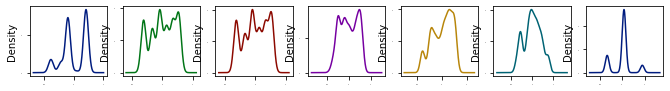

In [77]:
x.plot(kind="density",subplots=True,layout=(8,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

# Finding the best random state for Regression Models

In [78]:
#Importing required metrices and model for the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [79]:
#Finding the best random state
max_ran_score=0
for ran_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=ran_state,test_size=0.33)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_ran_score:
        max_ran_score=r2_scr
        final_ran_state=ran_state
print("max r2 score corresponding to",final_ran_state,"is",max_ran_score)

max r2 score corresponding to 38 is 0.36168766178191925


Thus we see that max r2 score corresponding to 38 is 36%

In [80]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=38,test_size=.33)

# Modeling without tuning

In [81]:
#Importing the algorithms and other parameters
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
#importing required metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [82]:
lr = LinearRegression()
lsr = linear_model.Lasso(random_state = 38)
rr = linear_model.Ridge(random_state=38)
rfr = RandomForestRegressor(random_state=38)
svr=SVR()
ada= AdaBoostRegressor()
gdb=GradientBoostingRegressor()
dtr = tree.DecisionTreeRegressor(random_state=38)
knnr = KNeighborsRegressor()
xg = XGBRegressor(random_state=38)


models=[lr,lsr,rr,svr,rfr,ada,gdb,dtr,knnr,xg]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape=[]
cvs=[]


for i in models:  
    i.fit(x_train,y_train)
    r2_train = round(i.score(x_train, y_train),3)
    r2_test = round(i.score(x_test, y_test),3)
    scores_train.append(round(r2_train,3))
    scores_test.append(round(r2_test,3))
    y_pred = i.predict(x_test)
    mape.append(round(mean_absolute_percentage_error(y_test, y_pred)*100,3))
    rmse_train.append(round(np.sqrt(mean_squared_error(y_train,i.predict(x_train))),3))
    rmse_test.append(round(np.sqrt(mean_squared_error(y_test,i.predict(x_test))),3))
       

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train R2': scores_train,'Test R2': scores_test, 'MAPE':mape},
            index=['Linear Regression','Lasso Regression','SVR Regression','AdaBoost Regression','GradientBoosting Regression','Ridge Regression','Random Forest Regression','Decision Tree Regression', 'KNN Regression','XGB Regression']))

                             Train RMSE  Test RMSE  Train R2  Test R2    MAPE
Linear Regression              4656.952   4381.787     0.287    0.362  25.922
Lasso Regression               4656.953   4382.009     0.287    0.362  25.926
SVR Regression                 4656.952   4381.911     0.287    0.362  25.923
AdaBoost Regression            5554.198   5465.530    -0.014    0.007  33.182
GradientBoosting Regression    1397.613   3501.029     0.936    0.593  18.802
Ridge Regression               4088.055   4242.588     0.451    0.402  26.721
Random Forest Regression       3371.289   3773.728     0.626    0.527  21.134
Decision Tree Regression         76.032   4819.002     1.000    0.228  23.717
KNN Regression                 3373.312   3837.615     0.626    0.510  20.892
XGB Regression                  923.447   3475.343     0.972    0.598  19.216


Observation: For Linear Models, the MAPE(Mean absolute percentage error) states that the predicted values are ~25-31% away from actuals where ridge is performing very badly.

For Non-Linear Models / ensemble models, Decision Tree models overfits. AdaBoost model performs poor whereas gradient boosting regression model is performing the best followed by  XGB Regression followed by random forest among non-linear models/ensemble models, with MAPE as 18.80% ,19.21% and 21.13% respectively .Comparing all the models, choosing XGB Regressor, Gradient Boosting Regressio model and Random Forest Regressor model for hyperparameter tunning to get more accuracy and score.

RMSE indicates the absolute fit of the model or spread out of residual. R2 indicates proportion of variance for a dependent variable that is explained by independent variables. Both RMSE and R2 are relative measure of fit. MAPE indicates to what extent predicated values are away from actual.

# cross validation score for all the models

In [83]:
#Random Forest Regressor  Model
from sklearn.model_selection import cross_val_score
rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

Cross Val Score: 44.759616429039255


In [84]:
#Decission Tree Regressor Model
dtscore=cross_val_score(dtr,x,y,cv=5)
dtc=dtscore.mean()
print('Cross Val Score:',dtc*100)

Cross Val Score: 3.598086707206842


In [85]:
#AdaBoost Regressor Model
adscore=cross_val_score(ada,x,y,cv=5)
adc=adscore.mean()
print('Cross Val Score:',adc*100)

Cross Val Score: 38.77709506598651


In [86]:
#Gradient Boosting Regressor Model
gbscore=cross_val_score(gdb,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

Cross Val Score: 37.66696231085568


In [87]:
#Support Vector Regressor Model
svscore=cross_val_score(svr,x,y,cv=5)
svc=svscore.mean()
print('Cross Val Score:',svc*100)

Cross Val Score: -2.450539563571583


In [88]:
lassoscore=cross_val_score(lsr,x,y,cv=5)
lsc=lassoscore.mean()
print('Cross Val Score:',lsc*100)

Cross Val Score: 28.809529582379888


In [89]:
#Ridge Model
ridgescore=cross_val_score(rr,x,y,cv=5)
rdc=ridgescore.mean()
print('Cross Val Score:',rdc*100)

Cross Val Score: 28.80057005105706


In [90]:
#Knn Regressor Model
knnscore=cross_val_score(knnr,x,y,cv=5)
knnc=knnscore.mean()
print('Cross Val Score:',knnc*100)

Cross Val Score: 37.11435395338691


In [91]:
#XGBoost Model
xgbscore=cross_val_score(xg,x,y,cv=5)
xgbc=xgbscore.mean()
print('Cross Val Score:',xgbc*100)

Cross Val Score: 40.4341598895949


Thus we can see cross validation scores of ten models as above found that at gradient boosting and random forest have good score.

Thus on the basis evaluation metrics like rmse,r2 score,MAPE and cross validation score,we will take Random Forest Regressor XGB Regressor and Gradient Boosting for hyperparamter tunning

### HYPERPARAMETER TUNING THROUGH GRIDSEARCHCV
So now we are going to fine-tune the hyperparameters using GridSearchCV on Gradient BoostingForest,XGB Regressor and Random Forest Regressor. GridSearchCV automatically tunes the hyperparameters with the parameters specified to find the best parameters and the best estimator,this helps us from manually having to tune, which would take a lot of time.

####  Hyperparameter tuning for Gradient Boosting Regressor

In [87]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= { 'loss':['squared_error','absolute_error'],
              'learning_rate':[0.1,0.01], 
              'n_estimators':[2,5,10,20],
              'criterion':['mae','mse'],      
            }

gdb=GradientBoostingRegressor()
clf=GridSearchCV(gdb,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}


In [88]:
gdb=GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error',n_estimators= 20, criterion= 'mse')
gdb.fit(x_train,y_train)
gdb.score(x_train,y_train)
pred_decision=gdb.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gdb,x,y,cv=5)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 45.49732986595721
Cross Val Score: 41.24820465273912


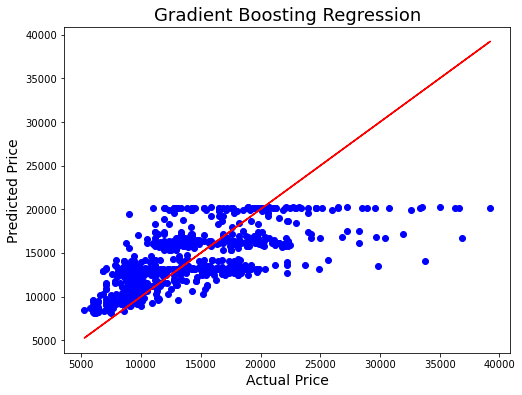

In [89]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("Gradient Boosting Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints and it is unable to cover most of the points.There are some datapoint far away from best fit line,which can increase the mse error so we can apply more techniques and regularise and improve the r2_score.

### Hyperparameter tuning for XGB Regressor

In [90]:
from xgboost import XGBRegressor
parameters= { 'n_estimators': [100, 400, 800],
               'max_depth': [3, 6, 9],
              'learning_rate': [0.05, 0.1, 0.20],
             'min_child_weight': [1, 10, 100]      
            }

xg=XGBRegressor()
clf=GridSearchCV(xg,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 800}


In [91]:
xg=XGBRegressor(learning_rate= 0.5,max_depth=6,min_child_weight=1,n_estimators=800 )
xg.fit(x_train,y_train)
xg.score(x_train,y_train)
pred_decision=xg.predict(x_test)

xgs=r2_score(y_test,pred_decision)
print('R2 Score',xgs*100)

xgscore=cross_val_score(xg,x,y,cv=5)
xgc=xgscore.mean()
print('Cross Val Score:',xgc *100)

R2 Score 57.0278228266943
Cross Val Score: 30.54567520189674


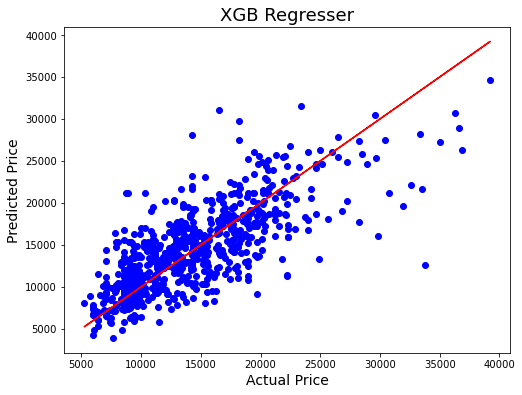

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("XGB Regresser",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints and it is covering most of the points.There are some datapoint far away from best fit line,which can increase the mse error so we can apply more techniques and regularise and improve the r2_score

### Hyperparameter tuning for Random Forest Regressor

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
parameters = {
    'max_depth':[2,5,10,20,30],
    'min_samples_leaf':[1,2,4],
    'n_estimators':[100,150,200],
    'min_samples_split':[2,5,10,15],
        }
rfr=RandomForestRegressor()
clf=GridSearchCV(rfr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [94]:
rfr=RandomForestRegressor(max_depth=20,min_samples_leaf=1,min_samples_split=2,n_estimators=200)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 59.336473159195215
Cross Val Score: 44.02797109234257


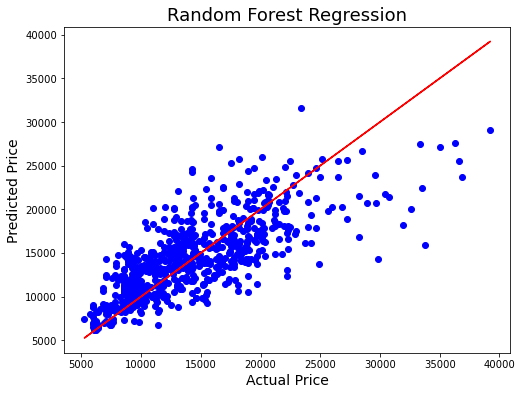

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Price",fontsize=14)
plt.ylabel("Predicted Price",fontsize=14)
plt.title("Random Forest Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints and it is covering most of the points.There are some datapoint far away from best fit line,which can increase the mse error so we can apply more techniques and regularise and improve the r2_score.

Model Analysis using Hyperparameter:
Thus After applying hyperparameter search through GridSearchcv we find that :

Model : r2_score accuracy //cross validation score (in %)

Random Forest Regressor : 59.34 // 44.02 

XGB Regressor : 57.02 // 30.54

Gradient Boosting Regressor:45.49 //41.24 

Thus we see that Random Forest Regressor is performing better with respect to r2 score  and cross val score.Thus we will choose Random Forest Regressor Model for further deployement process.

### Saving the model :Randon Forest Regressor :Best Model


In [104]:
import pickle
filename='flightprice.pkl'
pickle.dump(rfr,open(filename,'wb'))

### Loading the saved model

In [105]:
loaded_model=pickle.load(open('flightprice.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100) #it gives us 59.33% accuracy which is good.

59.336473159195215


In [106]:
loaded_model

RandomForestRegressor(max_depth=20, n_estimators=200)

We can see that Random Forest Regressor algorithm, which was finalized as best model and saved after we found that it was the best model performing, is loaded and also showing the best parameters we obtained after doing Hyperparameter Tuning.

# Predictions over test data

In [107]:
#Making a dataframe for the SalePrice predictions
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785
Predicted,22030.69,10481.956667,17803.375,26008.981,11454.552,16201.720417,13939.358214,15570.433333,25557.5725,11330.054167,16140.12,14579.209071,11337.6,17930.425,17319.116167,13401.875,13404.558552,16375.50775,8667.96,14722.839909,13209.38,13282.6,8633.32,8588.39,9029.2925,13037.24,9931.075,8801.605,12449.84,11727.951389,10738.725,20154.435,17802.1175,16993.361708,14321.395742,19563.741667,14977.29,8943.08,8370.255,16123.095,8240.57,14529.49,23903.75,12577.005931,13515.430625,9604.085,12994.505,13066.24,17626.694263,13613.990417,10882.8875,15650.895,9494.825583,24395.74,27502.12,10433.055833,9303.8875,6211.225,14277.151848,15512.777137,13710.750655,12826.916917,24255.215,9994.6925,15585.395,14802.585,9645.946711,16146.084277,20969.835,16643.44,15303.6195,16627.625,11885.635,17899.545,8450.315,15240.485949,21415.405,6613.945,14901.37,11997.134,20789.686833,10923.165,16086.271368,16235.37875,9018.47,9754.435,17484.981667,10832.185,12959.146071,16033.494449,10109.505,10908.897167,12171.68875,11687.355,8688.34,13380.12,10863.144375,20328.65,20703.651667,10062.925,14883.813333,16081.84,12792.23,11711.660893,11833.054444,11415.12,19948.105833,13467.93,8525.67,7159.98,10743.005,12926.666061,13211.549375,15629.91,23711.83,14193.285,13032.296611,17223.957431,16877.62,14318.204333,7483.47,11486.725,13262.328333,14138.434319,11077.956833,15340.845,9706.87,20125.275,18896.992282,16058.78,14422.8325,8455.425,20191.8725,13230.714765,20999.164167,10573.178833,11903.025,14132.253333,20203.68,16997.53,12152.805,12286.1655,9736.635833,15579.270821,18732.794,8917.055,13466.92,24129.38,8748.025,20553.54,14079.793828,19908.03,11720.855,13243.505,8648.985,16094.9825,10064.949,13702.831068,20018.931667,12039.225,7265.95,15976.863167,20464.22,13373.67875,13645.08,31570.99,11880.095,17119.585,6709.165,21288.07,12469.19,16773.454,16009.386628,10547.4525,8613.69,14177.835708,17727.21,9206.1275,17945.77,17975.158,23374.89,13272.78877,15770.62925,10318.137375,13914.359437,15509.102877,14998.605,12781.660486,11075.73,23494.445,25639.595,15239.65587,9390.995,12592.44119,8694.25,10717.655,15663.15

### Conclusion

CONCLUDING REMARKS: The objective of the case was to create a predictive machine learning model that predicts price of flights 
with the available independent variables in order to make informed choices. So first I started with scrapping the data of the flights from easytrip sites which took a very long time to scrape the details.Thus save the dataset in the csv format and loading the dataset and carry out data analysis and then did the EDA process with visualization patterns using pie-plot, box plot, distribution plot ,boxplot and learnt about different relationship between the features and target variable.

After that I did pre-processing techniques like checking outliers, removal of skewness, encoding of categorical column, 
Then I did the model training, building the model and finding out the best model out of several models on the basis of different evaluation metrices scores like Mean Absolute Error, Mean squared Error, Root Mean Squared Error,MAPE etc.

We find that Random Forest Regressor/XGB/Grdaient Boosting found to be the best fitted model as it was having somewhat less MAPE(which means how much predicted results and actual results are away,Less Mape means good fit model) and good R2 score.Then I did cross validation to reduce overfitting problem and I found random forest regressor,xgb regressor gradient boosting are performing well. So I did hypertunning through GridsearchCv on these three models taking the parameters to improve the model. Thus we observe that after hypertuning ,the score has improved.Thus concluded that Random Forest was performing well and save it as best model.

Thus finally concluding saying that Random Forest model was having the highest precision accuracy for prediction the price of the flights with machine learning data. Hence by implementation of this model one can make predeiction of the price of the flight on the features given.

I saved the best model using pickle method and loaded the model for prediction test and find 59.34% ~ 60% approx accuracy which is quite good. Thus this model can be used in further deployment process.

Overall, this dataset is good for predicting the Flight prices based on regression analysis using Random Forest Regressor as the best suited model.